In [101]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [86]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [87]:
train_images.shape

(60000, 28, 28)

In [88]:
train_images[0,23,23]

np.uint8(194)

In [89]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [90]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

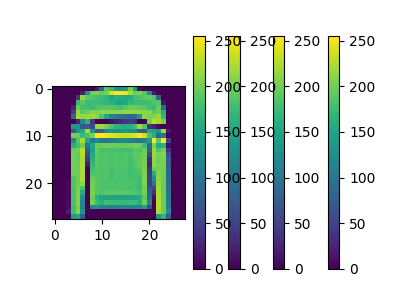

In [91]:
plt.Figure
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()


# Data Preprocessing

In [92]:
train_img = train_images /255
test_img = test_images /255

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [94]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
model.fit(train_img,train_labels , epochs = 1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.8244 - loss: 0.4959


In [ ]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose= 1)
print('Test accuracy ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8331 - loss: 66.6983
Tesr accuracy  0.8331000208854675


In [100]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [102]:
np.argmax(predictions[0])

np.int64(9)

In [103]:
test_labels[0]

np.uint8(9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


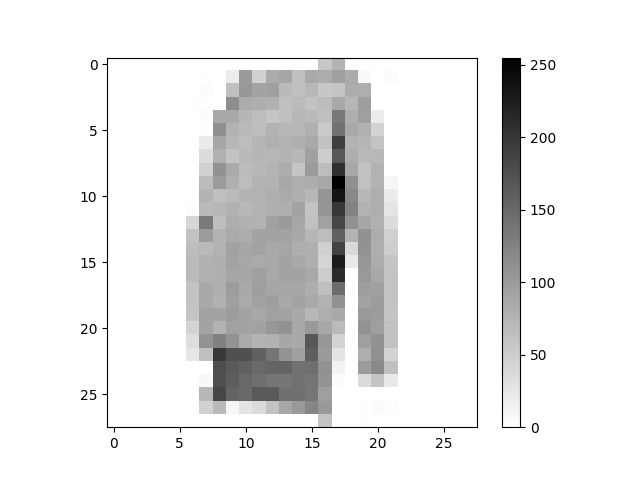

In [104]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
